In [28]:
from proj1_helpers import *
from implementations import *
from split_data import *
from gradient_descent import *
from costs import *
from build_polynomial import *
from cross_validation import *
from plots import *
import numpy as np

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
#import the data
yb, inputdata, ids = load_csv_data("train.csv")

In [30]:
def accuracys(y, tx, w):
    """Calculate the accuracy of a prediction
    """
    pred=predict_labels(w,tx)
    e=y-pred
    return 1-(sum(abs(e/2))/len(e))
def fast_buildpoly(x,ma,degree):
    return np.c_[ma,np.power(x, degree)]

def specialmean(x):
    filt = [e! = -999 for e in x]
    return np.mean(x[filt])

def specialstd(x):
    filt = [e!=-999 for e in x]
    return np.std(x[filt])

def predict_labels_train(weights, data, thr):
    """Generates class predictions given weights, and a test data matrix"""
    y_pred = np.dot(data, weights)
    y_pred[np.where(y_pred <= thr)] = -1
    y_pred[np.where(y_pred > thr)] = 1
    
    return y_pred

# Model 1: Linear Regression (without sparse data columns)

In [31]:
#Take only the columns that are not sparce
full_coll = [np.count_nonzero(np.transpose(inputdata)[i] ==-999)==0 for i in range (30)]
x_1 = np.transpose(np.transpose(inputdata)[full_coll])
x_1 = (x_1-np.mean(x_1,axis=0) ) / np.std(x_1,axis=0)

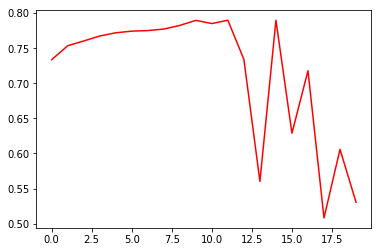

In [32]:
degree = np.arange(20)
acc = []
polyx = np.ones((len(x_1), 1))
for d in degree:
    polyx=fast_buildpoly(xfilter,polyx,d+1)
    w, _ =least_squares(yb,polyx)
    acc.append(accuracys(yb,polyx,w))
plt.plot(degree, acc, 'r') 
plt.show()
#todo display axis

By applying linear regression with different degree we find that the best fit seams to be 9

# Model 2: Linear regression with unknown set up to the mean

In [34]:
#replace unknown to mean and normalize
inT=np.transpose(inputdata)
means = [specialmean(a) for a in inT]
std = [specialstd(a) for a in inT]
x_2 = np.transpose([[x if x!=-999 else means[i] for x in inT[i]] for i in range(len(inT))] )
x_2 = (x_2-means)/std
#
x_2T = np.transpose(x_2)
x_2T = [[x if abs(x)<2 else 0 for x in x_2T[i]] for i in range(len(x_2T))] 
x_2 = np.transpose(x_2T)

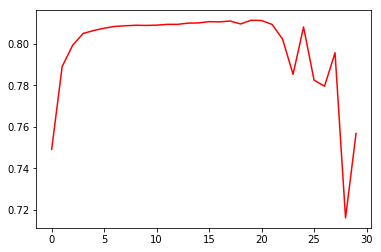

In [38]:
degree = np.arange(30)
acc_2 = []
polyx_2 = np.ones((len(x_2), 1))
for d in degree:
    polyx_2 = fast_buildpoly(x_2,polyx_2,d+1)
    w2 = least_squares(yb,polyx_2)
    acc_2.append(accuracys(yb,polyx_2,w2))
plt.plot(degree, acc_2, 'r')
plt.show()

# Model 3 : Delete the correlate variable

In [39]:
#replace unknown to mean and normalize
inT=np.transpose(inputdata)
means = [specialmean(a) for a in inT]
std = [specialstd(a) for a in inT]
x_3 = np.transpose([[x if x!=-999 else means[i] for x in inT[i]] for i in range(len(inT))] )
x_3 = (x_3-means)/std
#
x_3T = np.transpose(x_3)
x_3T = [[x if abs(x)<2 else 0 for x in x_3T[i]] for i in range(len(x_3T))] 
x_3 = np.transpose(x_3T)

In [44]:
for i in range(30):
    for j in range(30):
        if i != j and i < j:
            corr = np.abs(np.corrcoef(x_3T[j],x_3T[i])[1][0])
            if corr > 0.6:
                print(str(i)+" , "+str(j)+" : "+ str(corr))

0 , 2 : 0.684987694499
3 , 9 : 0.725834860096
3 , 21 : 0.664138459818
3 , 22 : 0.637397556685
3 , 29 : 0.730705913891
4 , 5 : 0.74663104988
4 , 6 : 0.794500732265
4 , 12 : 0.621641512705
5 , 6 : 0.656766593897
9 , 21 : 0.785371539358
9 , 22 : 0.704894458905
9 , 29 : 0.897463868475
21 , 22 : 0.610576244544
21 , 29 : 0.749078184417
22 , 29 : 0.754312248767


We can try to delete the collumn 0,3,4,5,9,21,22
